### Data Preprocessing

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_df = pd.read_csv('training.csv')
test_X_df = pd.read_csv('test_X.csv')

# Check the first few rows of the training data
print(train_df.head())

# Normalize the feature columns (assuming all columns except 'lettr' are features)
scaler = StandardScaler()
features = ['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

train_df[features] = scaler.fit_transform(train_df[features])
test_X_df[features] = scaler.transform(test_X_df[features])

# Optionally, check the scaled features
print(train_df.head())


  lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0     B      4      8      6     6      5      9      7      4      6     10   
1     B      1      0      1     0      0      7      7      6      4      7   
2     B      4      8      6     6      8      8      8      4      3      6   
3     B      4      7      6     5      5      8      6      5      6      9   
4     B      9     14      7     8      5      6      8      5      7     10   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0      5      6      2      8      6     10  
1      6      7      1      8      5      9  
2      7      7      6     11      8      9  
3      6      7      3      8      7      9  
4      6      8      6      6      7      9  
  lettr     x-box     y-box     width      high     onpix     x-bar     y-bar  \
0     B -0.043345  0.293116  0.318821  0.307425  0.647061  1.254123 -0.285295   
1     B -1.668781 -2.127903 -2.114928 -2.385346 -1.848491  0.092258 -0.285295   


In [85]:
%pip install keras
%pip install tensorflow

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/torchpippy-0.1.1+15dfcd8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/torchpippy-0.1.1+15dfcd8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [86]:
"""
using RELU activation function
"""

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

input_dim = len(features)  

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)

# Bottleneck
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)

# Output layer
output_layer = Dense(input_dim, activation='linear')(decoded)

# Create model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(), loss='mse')

# Model summary to inspect the architecture
autoencoder.summary()


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,008 (97.69 KB)

 Trainable params: 25,008 (97.69 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# from keras.models import Model
# from keras.layers import Input, Dense, LeakyReLU, ELU
# from keras.optimizers import Adam

# input_dim = len(features)

# # Input layer
# input_layer = Input(shape=(input_dim,))

# # Encoder with ELU
# encoded = Dense(128)(input_layer)
# encoded = ELU(alpha=1.0)(encoded)  # ELU activation
# encoded = Dense(64)(encoded)
# encoded = ELU(alpha=1.0)(encoded)  # ELU activation

# # Bottleneck with LeakyReLU
# bottleneck = Dense(32)(encoded)
# bottleneck = LeakyReLU(alpha=0.01)(bottleneck)  # LeakyReLU activation

# # Decoder with ELU
# decoded = Dense(64)(bottleneck)
# decoded = ELU(alpha=1.0)(decoded)  # ELU activation
# decoded = Dense(128)(decoded)
# decoded = ELU(alpha=1.0)(decoded)  # ELU activation

# # Output layer
# output_layer = Dense(input_dim, activation='linear')(decoded)

# # Create model
# autoencoder = Model(inputs=input_layer, outputs=output_layer)
# autoencoder.compile(optimizer=Adam(), loss='mse')

# # Model summary to inspect the architecture
# autoencoder.summary()


Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8862 - val_loss: 1.2680
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7130 - val_loss: 1.0566
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4631 - val_loss: 0.8940
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3695 - val_loss: 0.6548
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2688 - val_loss: 0.5690
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2118 - val_loss: 0.5312
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1769 - val_loss: 0.4810
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1755 - val_loss: 0.4621
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1668 - val_loss: 0.4712
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1685 - val_loss: 0.4868
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1556 - val_loss: 0.4147
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1

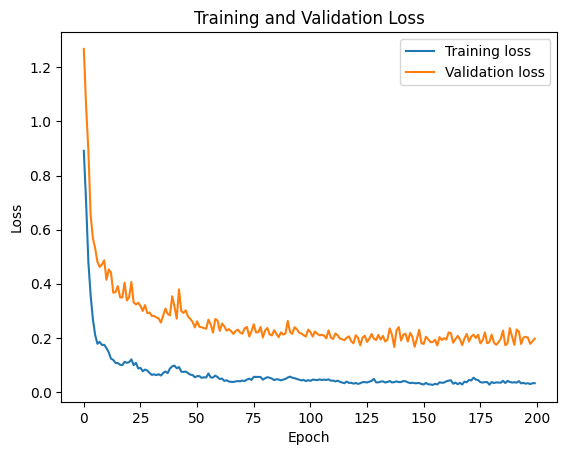

In [88]:
# Assuming you've already defined `train_df` and `features` as before
X_train = train_df[features].values  # Ensure your input features are correctly formatted as numpy arrays

# Training the model
history = autoencoder.fit(X_train, X_train,  # Input and output are the same for autoencoder
                          epochs=200,         # Number of epochs (iterations over the entire dataset)
                          batch_size=256,    # Number of samples per gradient update
                          shuffle=False,      # Shuffle the data before each epoch
                          validation_split=0.2)  # Fraction of the training data to be used as validation data

# Plotting the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step


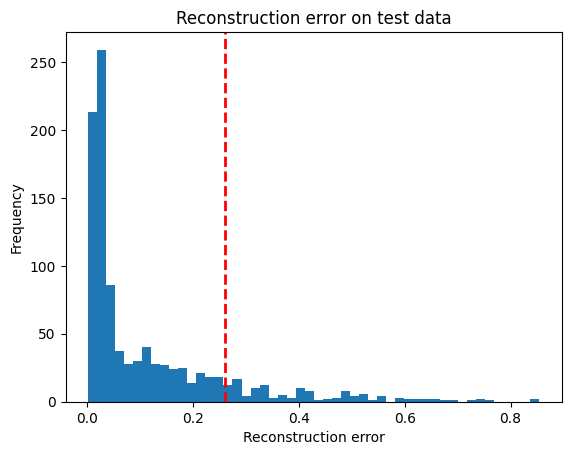

Percentage of anomalies detected: 13.100000000000001 %


In [89]:
import numpy as np

# Compute reconstruction error on training data
X_train_pred = autoencoder.predict(X_train)
train_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(train_mse, 95)  # Set threshold as 95th percentile of training MSE

# Compute MSE on test data
X_test = test_X_df[features].values
X_test_pred = autoencoder.predict(X_test)
test_mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Detecting anomalies in the test data
anomalies = test_mse > threshold

# Visualize
plt.hist(test_mse, bins=50)
plt.axvline(x=threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Reconstruction error on test data')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()

# Output the percentage of detected anomalies
print("Percentage of anomalies detected:", np.mean(anomalies) * 100, "%")


In [90]:
print(test_mse.shape)
# print(test_mse)

# outliers = anomalies.astype(int)
# print(outliers)

import csv
header = ['id', 'outliers']
filename = 'output.csv'
with open(filename, 'w') as file:
    csvwriter = csv.writer(file)
    csvwriter.writerow(header)
    for idx, row in enumerate(test_mse):
        file.write(str(idx) + ', ' + str(row))
        file.write('\n')

(1000,)
